# Hands-on Activity 4.3 - Instance Segmentation on Custom Dataset

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
2nd Semester | AY 2023-2024
--- | ---
<u>**ACTIVITY NO. 4.3** | **Instance Segmentation on Custom Dataset**
**Name** | Mendoza, Paulo
--- | ---
**Section** | CPE32S8
**Date Performed**: | April 1, 2024
**Date Submitted**: | April 1, 2024
**Instructor**: | Engr. Roman M. Richard


# YOLOv5 Instance Segmentation Tutorial

YOLOv5 supports instance segmentation tasks too. This is the official YOLOv5 instance segmentation notebook tutorial. YOLOv5 is maintained by [Ultralytics](https://github.com/ultralytics/yolov5).

This notebook covers:

*   Inference with out-of-the-box YOLOv5 instance segmentation on COCO-128 Segmentatation
*  [Training YOLOv5 instance segmentation](https://blog.roboflow.com//train-yolov5-instance-segmentation-custom-dataset) on custom data

*Looking for custom data? Explore over 66M community datasets on [Roboflow Universe](https://universe.roboflow.com).*

This notebook was created with Google Colab. [Click here](https://colab.research.google.com/drive/1JTz7kpmHsg-5qwVz2d2IH3AaenI1tv0N?usp=sharing) to run it.

# 0. Setup
Pull in respective libraries to prepare the notebook environment

*sir I have also tried YOLOv3 but I found out about YOLOv8 which is a better version so in this notebook I used YOLOv8 but the YOLOv3 implementation can be found here: https://colab.research.google.com/drive/1IPoqRcm7DOspQV-dj0F0H4xBu92-yhoJ?usp=sharing*

In [1]:
# install torch 1st before ultralytics or uninstall torch torchvision torchaudio then install this torch
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
import torch
print(torch.cuda.device_count())
print(torch.cuda.is_available())

Looking in indexes: https://download.pytorch.org/whl/cu121
1
True


In [2]:
!pip install ultralytics

In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

In [4]:
import torch
print(torch.__version__) 

2.2.2+cu121


In [5]:
import os
HOME = os.getcwd()
print(HOME)

d:\datasci\projectFiles\hoa_4_3


# 1. Inference on test image

To demonstrate YOLOv5 instance segmentation, we'll leverage an already trained model. In this case, we'll download the COCO-128 trained models pretrained on COCO-128 using YOLOv5 Utils.

If you'd like to skip to custom trainining, jump to section 3 below.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# infer using segment/predict.py

%cd {HOME}/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/bus.jpg --name test-inference


/content/yolov5
segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/bus.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=test-inference, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 56.0ms
Speed: 0.7ms pre-process, 56.0ms inference, 747.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/test-inference


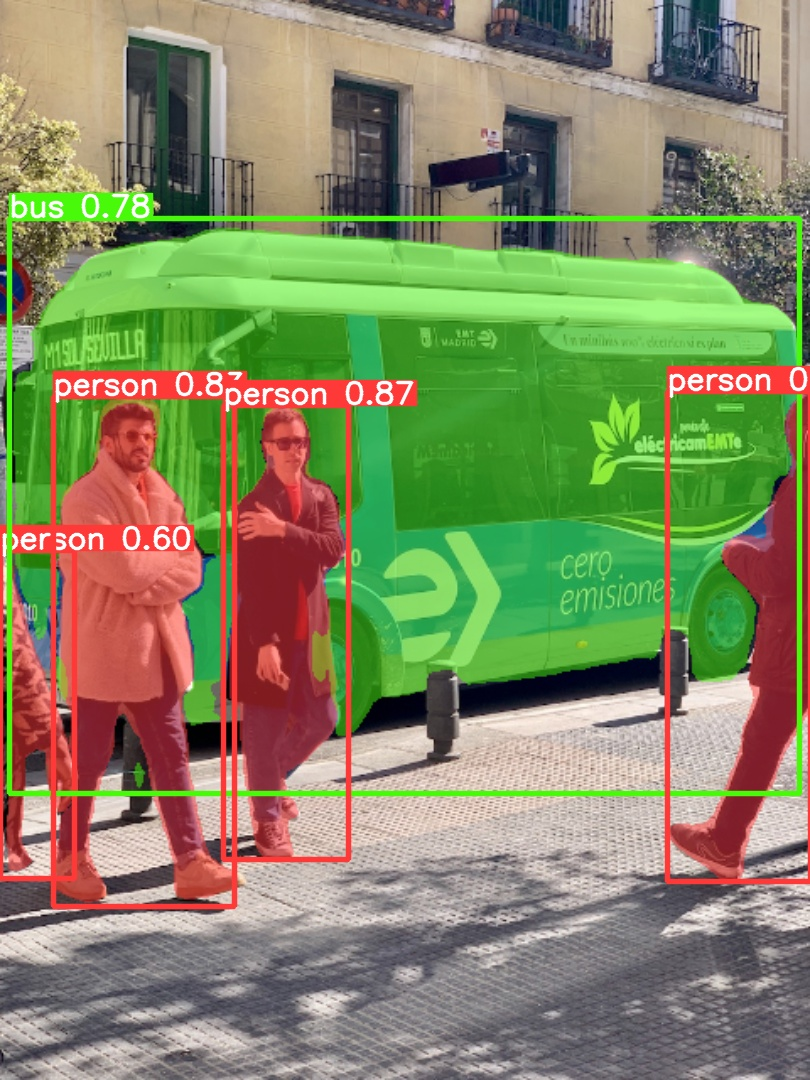

In [6]:
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/test-inference/bus.jpg", width=600)

In [7]:
ownImagePath = "/content/drive/MyDrive/data sci 3 files/mounted files/busWithPeople.png"
!python segment/predict.py --weights weights/yolov5s-seg.pt --source "{ownImagePath}" --name test-inference


segment/predict: weights=['weights/yolov5s-seg.pt'], source=/content/drive/MyDrive/data sci 3 files/mounted files/busWithPeople.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=test-inference, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
image 1/1 /content/drive/MyDrive/data sci 3 files/mounted files/busWithPeople.png: 480x640 2 persons, 3 buss, 1 skateboard, 59.8ms
Speed: 0.7ms pre-process, 59.8ms inference, 484.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predi

In [8]:
!python segment/predict.py --weights weights/yolov5s-seg.pt --source "/content/drive/MyDrive/data sci 3 files/mounted files/busWithPeople.png" --name test-inference


segment/predict: weights=['weights/yolov5s-seg.pt'], source=/content/drive/MyDrive/data sci 3 files/mounted files/busWithPeople.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=test-inference, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/data sci 3 files/mounted files/busWithPeople.png: 480x640 2 persons, 3 buss, 1 skateboard, 108.9ms
Speed: 0.8ms pre-process, 108.9ms inference, 584.4ms NMS per image at shape 

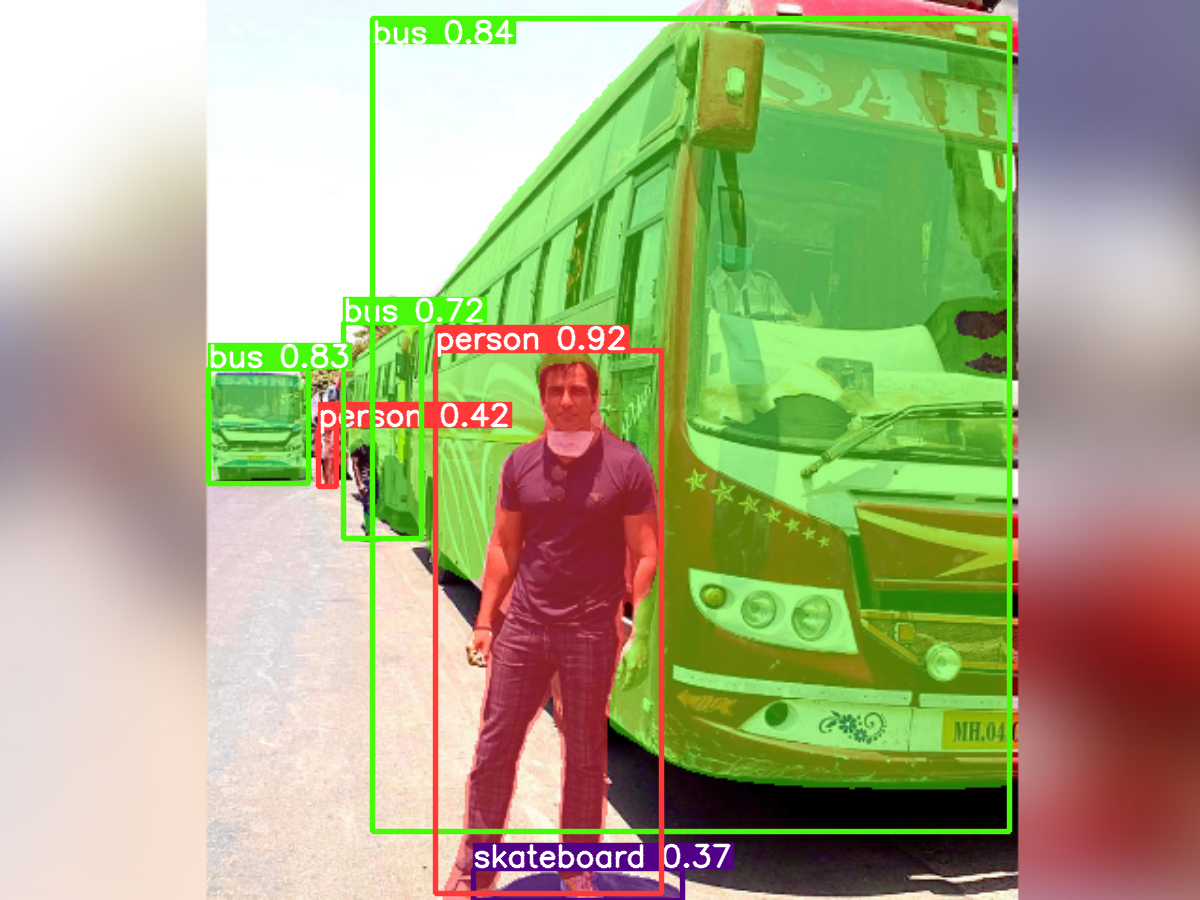

In [9]:
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/test-inference3/busWithPeople.png", width=600)

# 2. Infer on COCO image

In [ ]:
#Download example image
import requests
image_url = "https://i.imgur.com/EbOBS5l.jpg"
response = requests.get(image_url)
response.raise_for_status()
with open(f"{HOME}/yolov5/data/images/zebra.jpg", "wb") as handler:
    handler.write(response.content)

In [ ]:
#Infer using segment/predict.py
%cd {HOME}/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/zebra.jpg --name coco
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/coco/zebra.jpg", width=600)

segment/predict: weights=['weights/yolov5s-seg.pt'], source=/content/drive/MyDrive/data sci 3 files/mounted files/zebra.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=coco, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/MyDrive/data sci 3 files/mounted files/zebra.png: 448x640 1 zebra, 89.9ms
Speed: 0.7ms pre-process, 89.9ms inference, 851.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/c

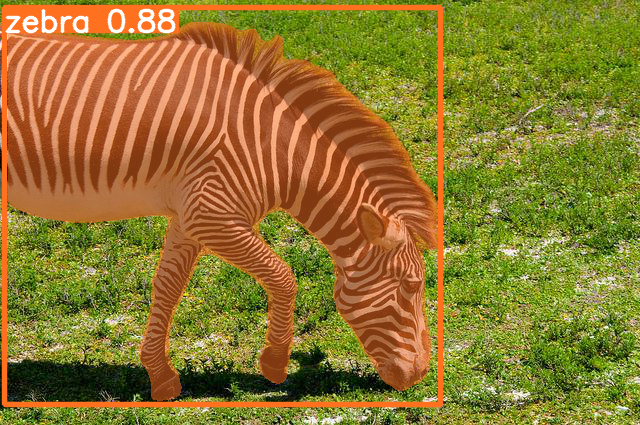

In [16]:
ownImagePath = "/content/drive/MyDrive/data sci 3 files/mounted files/zebra.png"
!python segment/predict.py --weights weights/yolov5s-seg.pt --source "{ownImagePath}" --name coco
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/coco2/zebra.png", width=600)

## 3. (Optional) Validate

Use the `segment/val.py` script to run validation for the model. This will show us the model's performance.

First, we need to download COCO-128.

In [14]:
torch.hub.download_url_to_file("https://ultralytics.com/assets/coco128-seg.zip", f"{HOME}/tmp.zip")
!unzip -q {HOME}/tmp.zip -d {HOME}/yolov5/datasets
!rm {HOME}/tmp.zip

100%|██████████| 6.79M/6.79M [00:00<00:00, 132MB/s]


In [15]:
%cd {HOME}/yolov5
!python segment/val.py --weights yolov5s-seg.pt --data coco128-seg.yaml --img 640 --name coco

/content/yolov5
segment/val: data=/content/yolov5/data/coco128-seg.yaml, weights=['yolov5s-seg.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=coco, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100% 14.9M/14.9M [00:00<00:00, 208MB/s]

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs

Dataset not found ⚠️, missing paths ['/content/datasets/coco128-seg/images/train2017']
100% 6.79M/6.79M [00:00<00:00, 139MB/s]
Dataset download success ✅ (1.0s), saved to /content/datasets
val: Scanning /content/datasets/coco128-seg/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<00:00, 484.04it/s]
val: New cache created: /content/datasets/coco128-s

The output shows performance metrics for the COCO-128 validation dataset.

# 4. Train On Custom Data

To train on custom data, we need to prepare a dataset with custom labels.

To prepare custom data, we'll use [Roboflow](https://roboflow.com). Roboflow enables easy dataset prep with your team, including labeling, formatting into the right export format, deploying, and active learning with a `pip` package.

If you need custom data, there are over 66M open source images from the community on [Roboflow Universe](https://universe.roboflow.com).

(For more guidance, here's a detailed blog on [training YOLOv5 instance segmentation on custom data](https://blog.roboflow.com/train-yolov5-instance-segmentation-custom-dataset).)


Create a free Roboflow account, upload your data, and label.

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-annotation.gif)

### Load Custom Dataset

Next, we'll export our dataset into the right directory structure for training YOLOv5 segmentation to load into this notebook. Select the `Export` button at the top of the version page, `YOLO v5 Pytorch` type, and `show download code`.

This ensures all our directories are in the right format with the needed data.yaml file:

```
dataset
├── train
│   ├── images
│   │   ├── IMG_123.jpg
│   └── labels
│       ├── IMG_123.txt
├── valid
│   ├── images
│   │   ├── IMG_456.jpg
│   └── labels
│       ├── IMG_456.txt
├── test
│   ├── images
│   │   ├── IMG_789.jpg
│   └── labels
│       ├── IMG_789.txt
├── data.yaml
├── README.roboflow.txt
```

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-format.gif)


Copy and paste that snippet into the cell below.

In [6]:
!pip install roboflow

In [7]:
# Specify the new directory name
new_folder_name = "datasets"

# Combine the home directory and new folder name
new_folder_path = os.path.join(HOME, new_folder_name)

# Create the new folder
try:
    os.mkdir(new_folder_path)

except Exception as e:
    # Catch more general exceptions
    print(f"An exception occurred: {e}")

An exception occurred: [WinError 183] Cannot create a file when that file already exists: 'd:\\datasci\\projectFiles\\hoa_4_3\\datasets'


In [9]:
%cd {HOME}/datasets

d:\datasci\projectFiles\hoa_4_3\datasets


*I have chosen this dataset: https://universe.roboflow.com/lebedeva-tatyana-qbirz/fruit-w1ted*

In [10]:
from roboflow import Roboflow
rf = Roboflow(api_key="F9m2TdCpJmeMP1XVGhOF")
project = rf.workspace("lebedeva-tatyana-qbirz").project("fruit-w1ted")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.45, to fix: `pip install ultralytics==8.0.196`


In [11]:
%cd {HOME}

d:\datasci\projectFiles\hoa_4_3


### Train On Custom Data 🎉
Here, we use the `dataset.location` attribute to pass our dataset to the `--data` parameter.

Note: we're training for 100 epochs here. We're also starting training from the pretrained weights. Larger datasets will likely benefit from longer training.

In [12]:
model = YOLO('yolov8n-seg.yaml').load('yolov8n.pt') 

100%|██████████| 6.23M/6.23M [00:00<00:00, 21.8MB/s]

Transferred 355/417 items from pretrained weights


In [14]:
results = model.train(data=rf"{dataset.location}/data.yaml", epochs=10, imgsz=640)

Ultralytics YOLOv8.1.45  Python-3.12.2 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: task=segment, mode=train, model=yolov8n-seg.yaml, data=d:\datasci\projectFiles\hoa_4_3\datasets\FRUIT-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=

train: Scanning D:\datasci\projectFiles\hoa_4_3\datasets\FRUIT-2\train\labels... 199 images, 1 backgrounds, 0 corrupt: 100%|██████████| 199/199 [00:00<00:00, 344.19it/s]

train: New cache created: D:\datasci\projectFiles\hoa_4_3\datasets\FRUIT-2\train\labels.cache



val: Scanning D:\datasci\projectFiles\hoa_4_3\datasets\FRUIT-2\valid\labels... 57 images, 0 backgrounds, 0 corrupt: 100%|██████████| 57/57 [00:00<00:00, 345.09it/s]

val: WARNING  D:\datasci\projectFiles\hoa_4_3\datasets\FRUIT-2\valid\images\images-2023-02-07T155938-672_jpeg_jpg.rf.324131edec3950f86fff312c37afbcd3.jpg: 1 duplicate labels removed
val: New cache created: D:\datasci\projectFiles\hoa_4_3\datasets\FRUIT-2\valid\labels.cache


Plotting labels to runs\segment\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\segment\train2
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10       2.7G     0.8832      7.292      3.673      1.441         14        640: 100%|██████████| 13/13 [00:06<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.27it/s]

                   all         57        129    0.00739      0.905     0.0982     0.0605   0.000155     0.0108   0.000928   0.000267



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.62G     0.6604      4.528       3.24      1.271         15        640: 100%|██████████| 13/13 [00:04<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         57        129    0.00938      0.968      0.211      0.142    0.00804      0.827      0.143      0.056



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.89G     0.6404       3.58      2.887       1.25         12        640: 100%|██████████| 13/13 [00:04<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]

                   all         57        129     0.0107      0.977      0.211      0.145    0.00985      0.896      0.179     0.0993



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.75G      0.639      3.076      2.578      1.223         17        640: 100%|██████████| 13/13 [00:03<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.89it/s]

                   all         57        129    0.00836      0.984      0.335      0.268    0.00809      0.944      0.329      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.62G     0.6342      2.909      2.239      1.232         12        640: 100%|██████████| 13/13 [00:04<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         57        129      0.652      0.242       0.38      0.287      0.644      0.227      0.362      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.89G     0.5725      2.779      2.036      1.164         13        640: 100%|██████████| 13/13 [00:03<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         57        129      0.584      0.447      0.521      0.409      0.612      0.413      0.495      0.305



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.76G      0.495      2.665      1.818      1.077         22        640: 100%|██████████| 13/13 [00:03<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]

                   all         57        129      0.458      0.559      0.554      0.429      0.435      0.526      0.518      0.312



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.76G     0.5035      2.675      1.757      1.096         20        640: 100%|██████████| 13/13 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         57        129      0.463      0.667        0.6      0.488      0.445      0.618       0.57      0.355



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.89G     0.4617       2.45      1.614      1.036         14        640: 100%|██████████| 13/13 [00:04<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.30it/s]

                   all         57        129      0.797      0.556      0.662      0.561      0.776      0.535      0.622      0.398



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.89G     0.4447      2.493      1.529      1.048         16        640: 100%|██████████| 13/13 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.83it/s]

                   all         57        129      0.621      0.593        0.7      0.586      0.786      0.549      0.652      0.424



10 epochs completed in 0.024 hours.
Optimizer stripped from runs\segment\train2\weights\last.pt, 6.8MB
Optimizer stripped from runs\segment\train2\weights\best.pt, 6.8MB

Validating runs\segment\train2\weights\best.pt...
Ultralytics YOLOv8.1.45  Python-3.12.2 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLOv8n-seg summary (fused): 195 layers, 3259234 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.55it/s]


                   all         57        129      0.636      0.592      0.701      0.586      0.786      0.548      0.653      0.423
                 apple         57         31      0.844      0.613      0.785      0.721       0.81      0.581      0.716      0.574
                  kiwi         57         32      0.757      0.875      0.871       0.78      0.779      0.875      0.855      0.438
                 mango         57         12          0          0       0.23      0.158          1          0      0.213      0.148
                orange         57         24      0.798       0.33      0.639       0.53      0.778      0.293      0.556      0.312
                  pear         57         11      0.855          1      0.988      0.716      0.795      0.909      0.905      0.604
            watermelon         57         19      0.564      0.737      0.693      0.614      0.553      0.632      0.675      0.461
Speed: 0.2ms preprocess, 4.0ms inference, 0.0ms loss, 1.4ms postproce

Above we see training plots for our custom trained model. This plot along with other detailed results and sample predictions are all automatically generated and stored in the `runs` folder. See `runs/train-seg/exp`.

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [22]:
metrics = model.val() 

Ultralytics YOLOv8.1.45  Python-3.12.2 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLOv8n-seg summary (fused): 195 layers, 3259234 parameters, 0 gradients


val: Scanning D:\datasci\projectFiles\hoa_4_3\datasets\FRUIT-2\valid\labels.cache... 57 images, 0 backgrounds, 0 corrupt: 100%|██████████| 57/57 [00:00<?, ?it/s]

val: WARNING  D:\datasci\projectFiles\hoa_4_3\datasets\FRUIT-2\valid\images\images-2023-02-07T155938-672_jpeg_jpg.rf.324131edec3950f86fff312c37afbcd3.jpg: 1 duplicate labels removed



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.79s/it]


                   all         57        129      0.621      0.593        0.7      0.584      0.786      0.549      0.652      0.422
                 apple         57         31      0.841      0.613      0.784       0.72       0.81      0.581      0.715      0.574
                  kiwi         57         32      0.754      0.875      0.871      0.771      0.778      0.875      0.855      0.444
                 mango         57         12          0          0      0.229      0.156          1          0      0.212      0.148
                orange         57         24      0.747      0.333      0.632      0.526       0.78      0.296      0.549      0.306
                  pear         57         11      0.851          1      0.988      0.716      0.795      0.909      0.905      0.602
            watermelon         57         19      0.531      0.737      0.693      0.614      0.553      0.632      0.675      0.461
Speed: 1.6ms preprocess, 19.2ms inference, 0.0ms loss, 3.4ms postproc

*I have added metrics*

d:\datasci\projectFiles\hoa_4_3


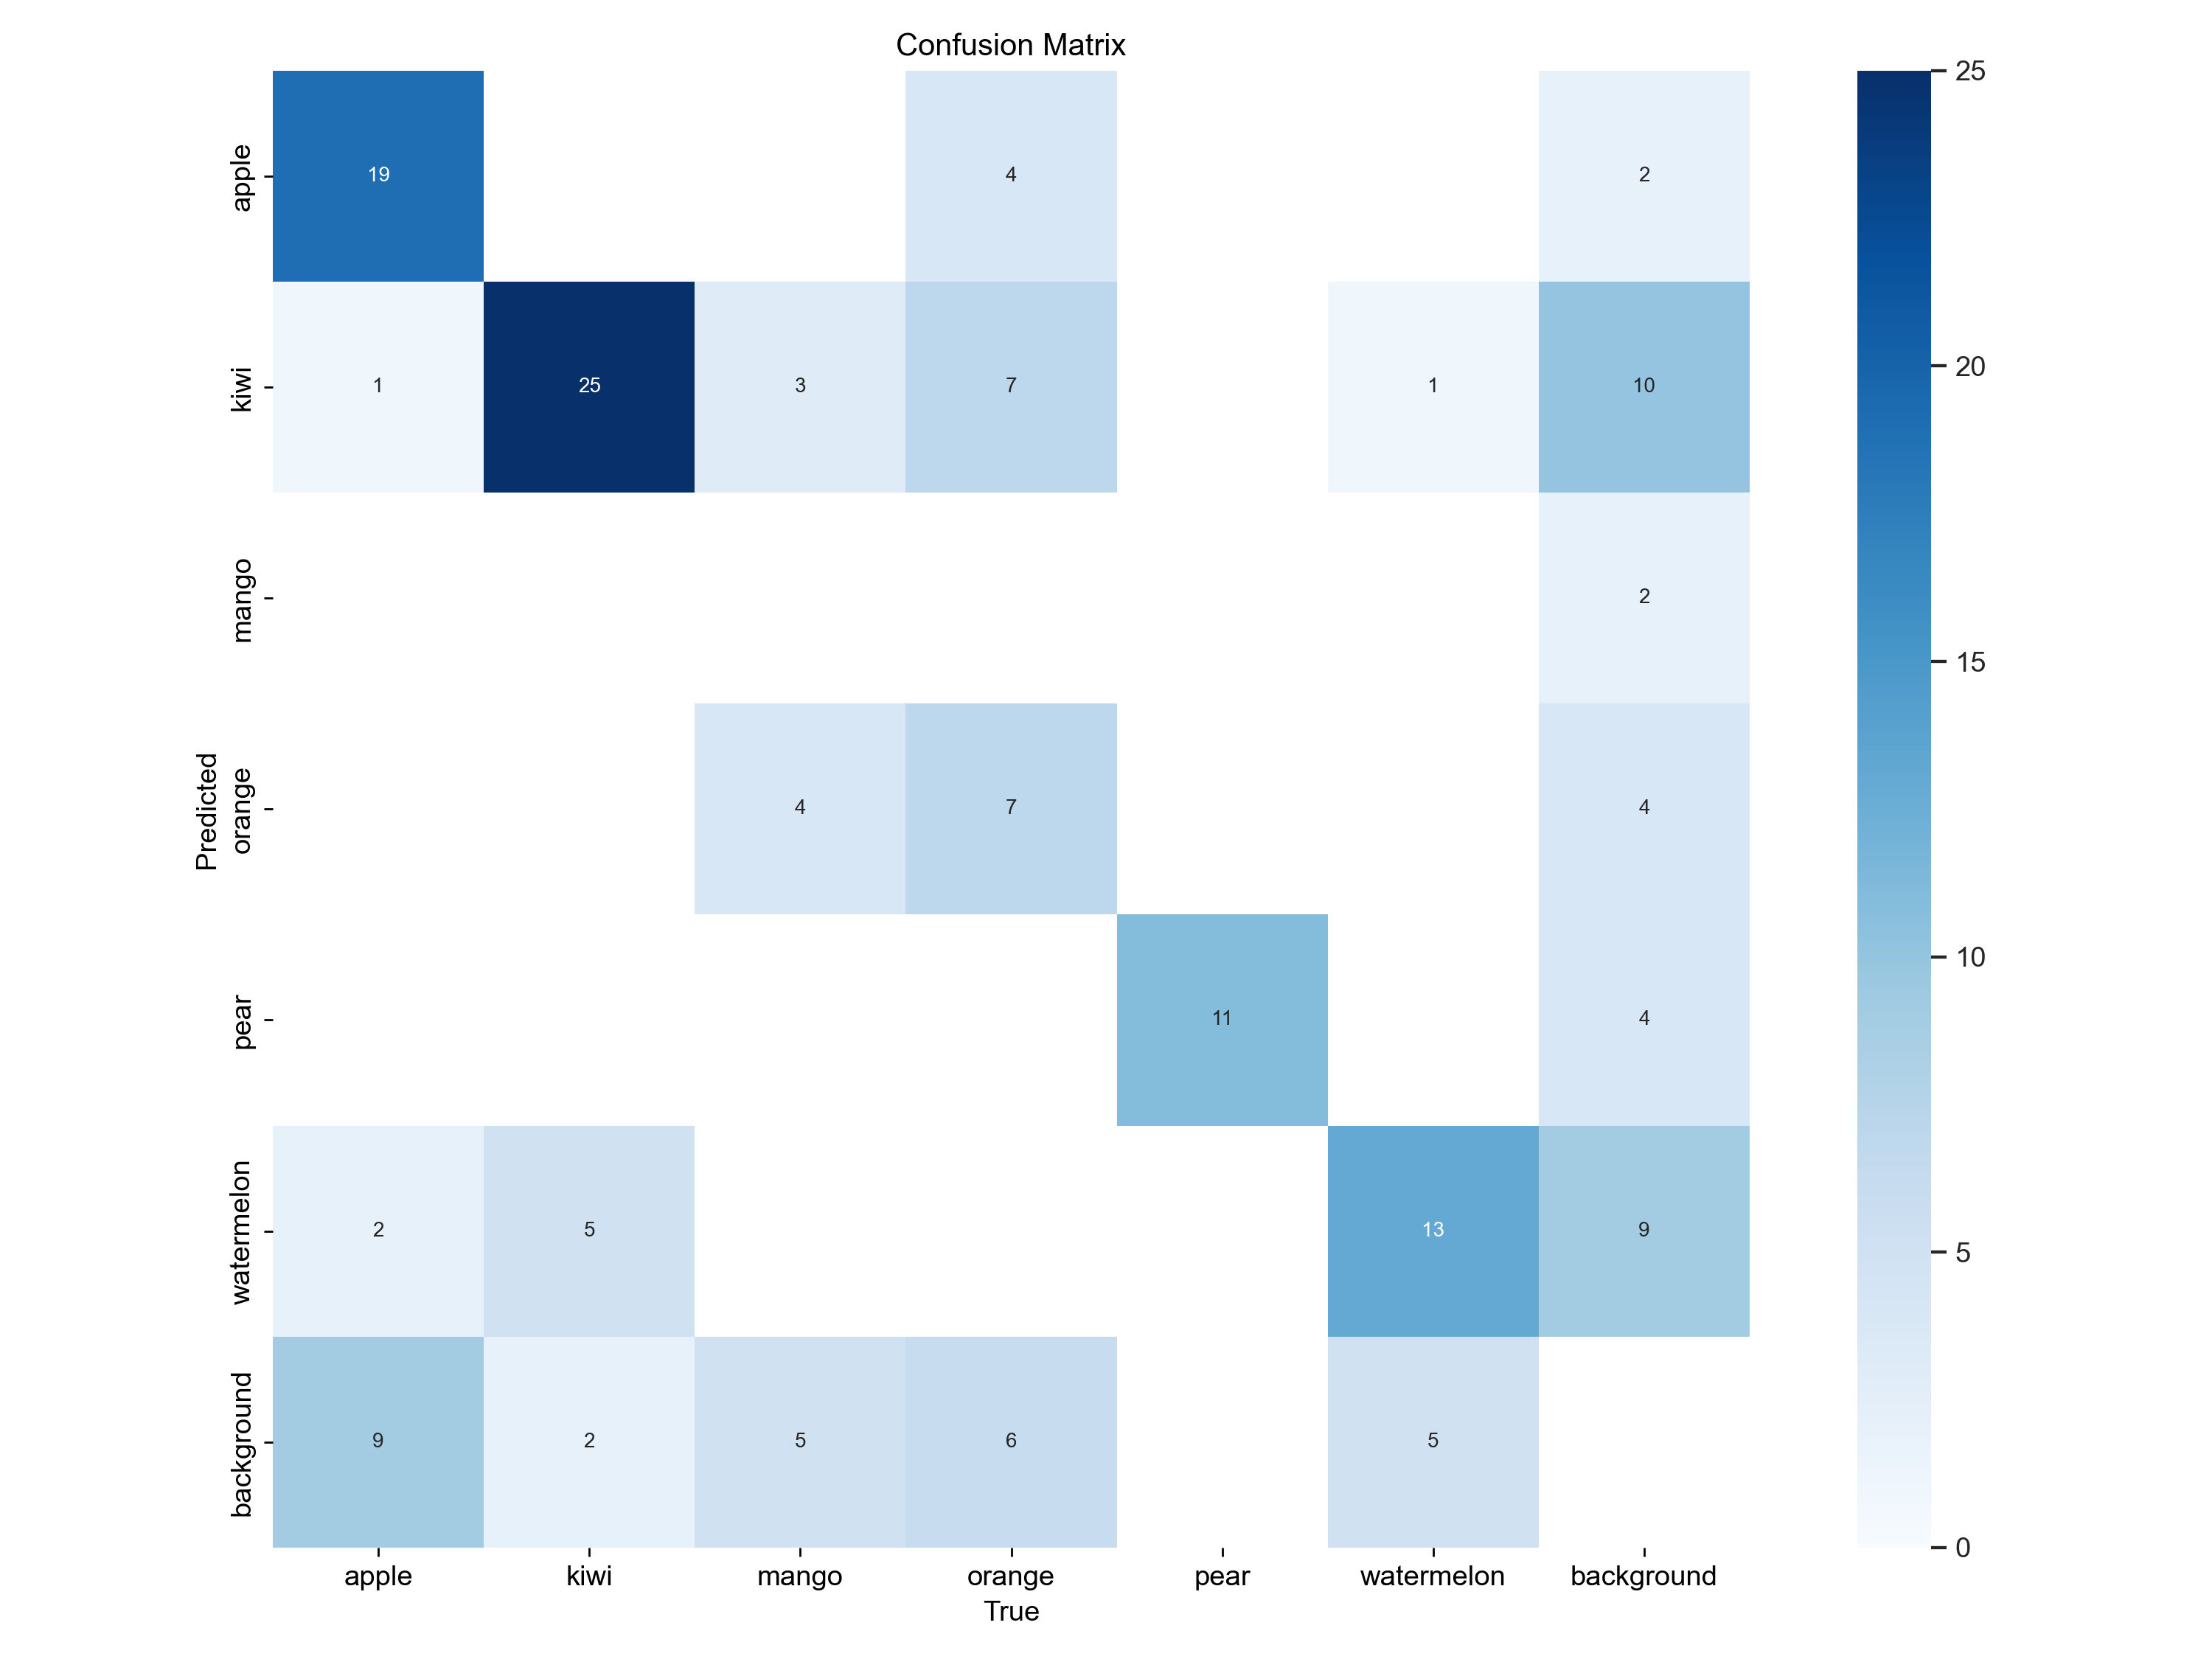

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/confusion_matrix.png', width=600)

d:\datasci\projectFiles\hoa_4_3


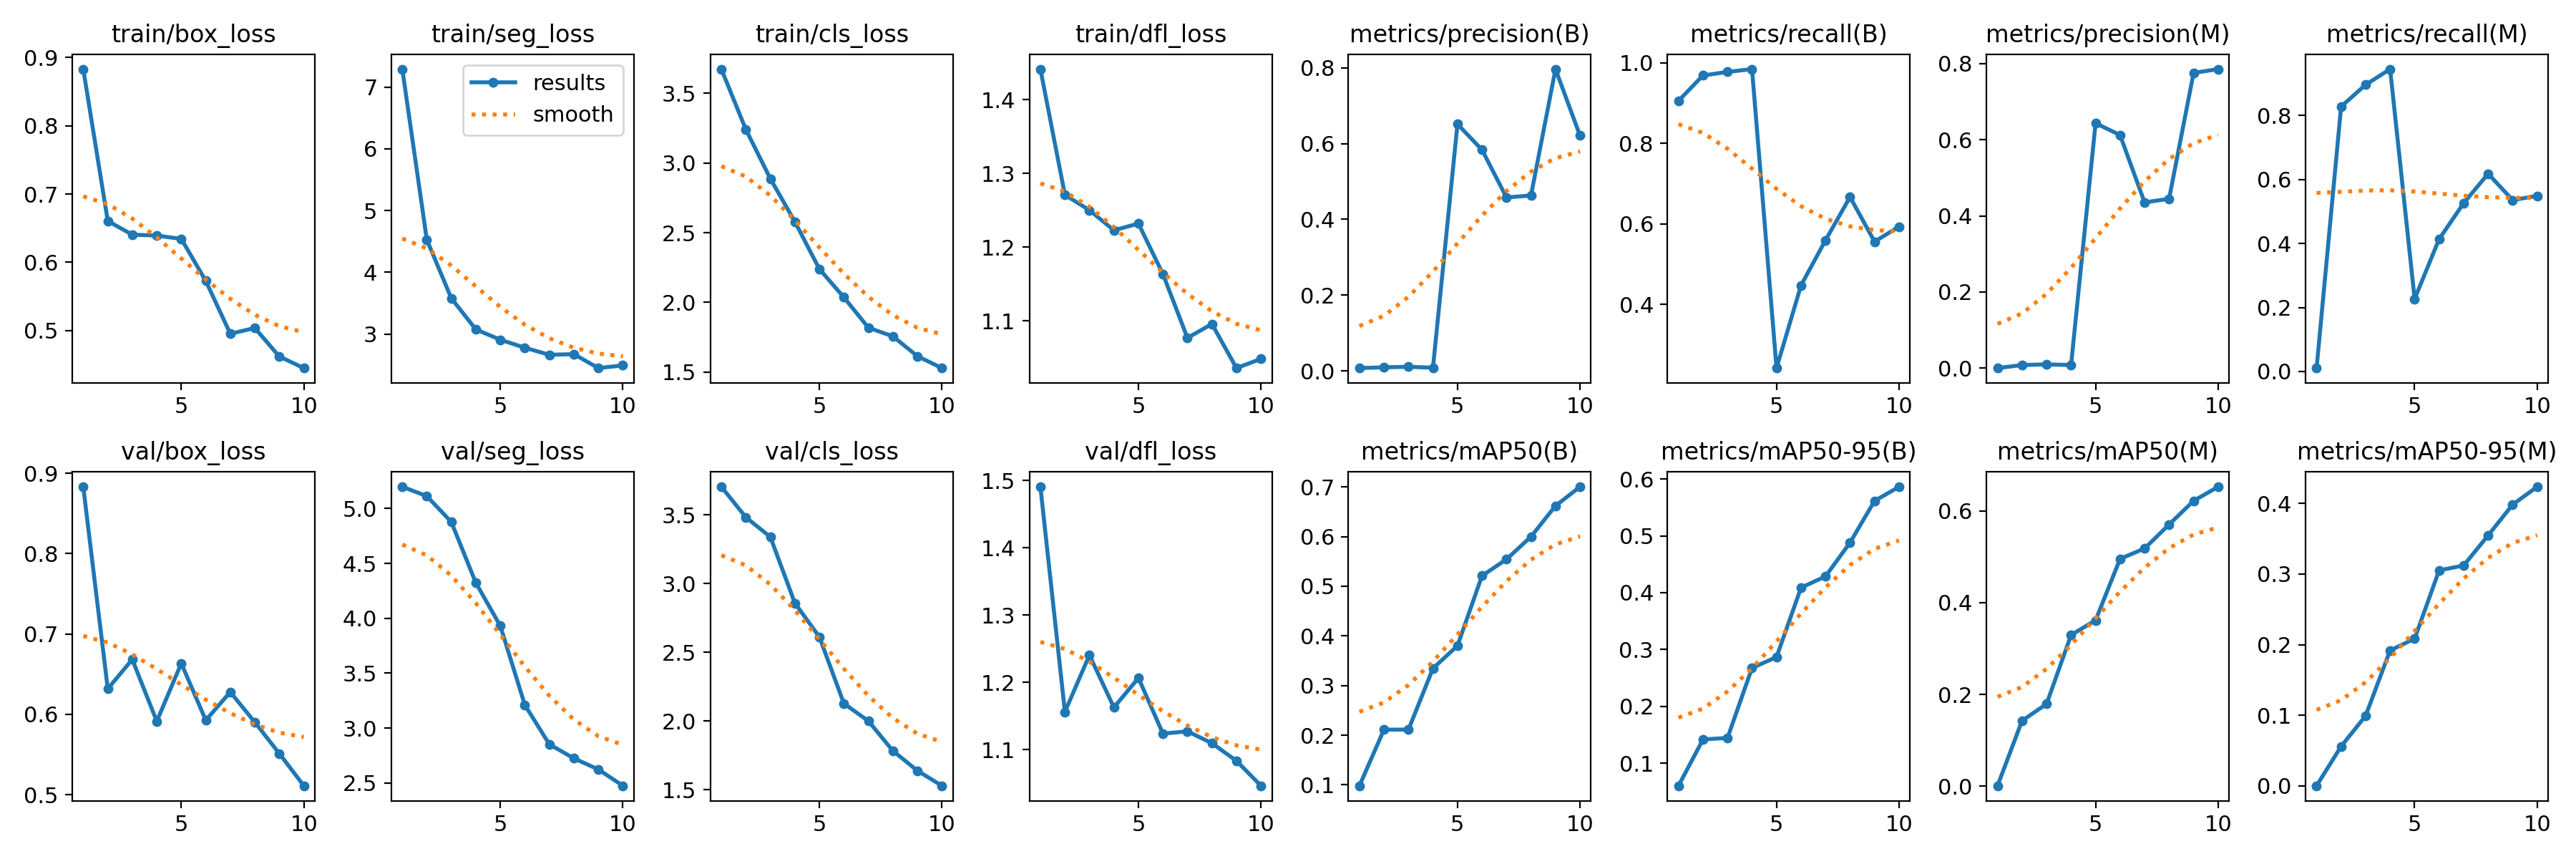

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/results.png', width=600)

### Infer With Your Custom Model

d:\datasci\projectFiles\hoa_4_3


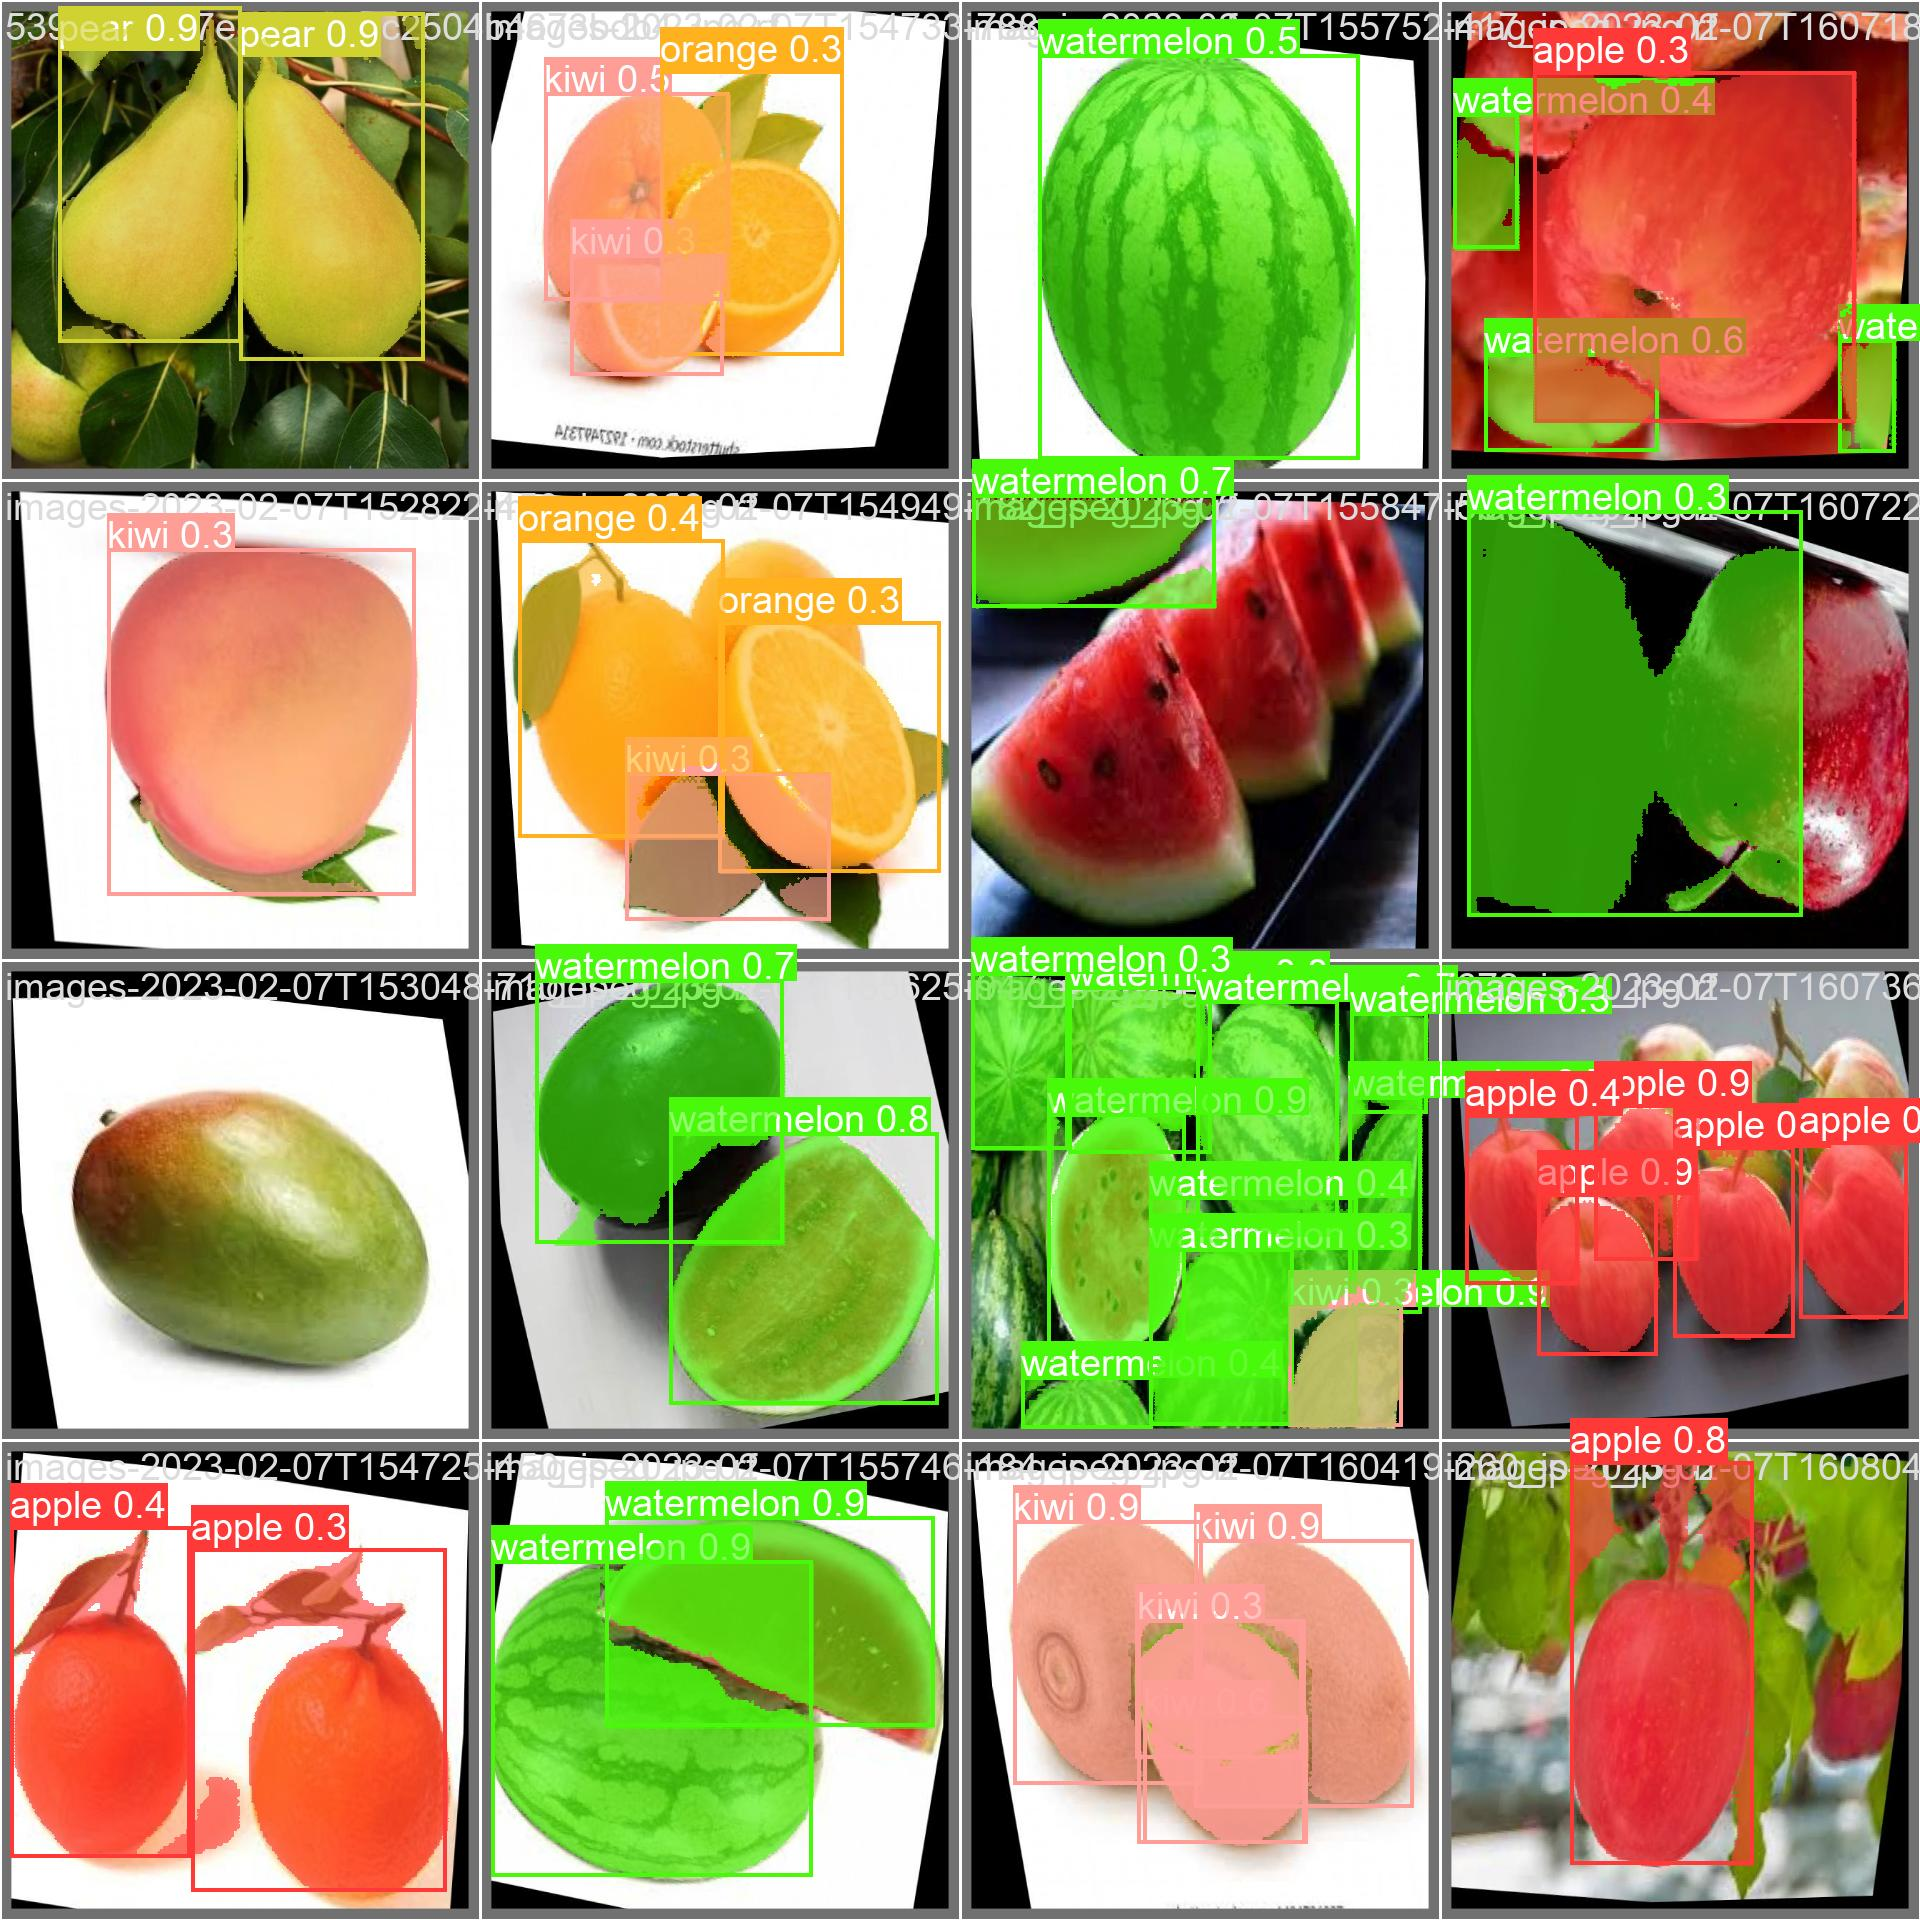

In [21]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train2/val_batch0_pred.jpg', width=600)

The image above shows the resulting prediction overlayed on the input image.

## (OPTIONAL) Improve Our Model with Active Learning

Now that we've trained our model once, we will want to continue to improve its performance. Improvement is largely dependent on improving our dataset.

We can programmatically upload example failure images back to our custom dataset based on conditions (like seeing an underrpresented class or a low confidence score) using the same `pip` package.

In [24]:
#Prepare Our Example Image Directory
#To run on your own images, replace the directory on the line below with a
#directory you provide (by uploading to the colab environment, for example)
example_image_dir = "../example_images"

#We are going to download example images from the web for the purposes of this
#demo. These images are relevant to the ASL Poly dataset. Skip the rest of this
#cell if you are providing your own example image directory.
os.makedirs(example_image_dir, exist_ok=True)
image_urls = [
    "https://i.imgur.com/rFsDnHC.jpg",
    "https://i.imgur.com/aEcceXm.jpg",
    "https://i.imgur.com/s4N63fx.jpg",
    ]

for i, image_url in enumerate(image_urls):
    response = requests.get(image_url)
    response.raise_for_status()
    with open(os.path.join(example_image_dir,f'example_{i}.jpg'), 'wb') as handler:
        handler.write(response.content)

HTTPError: 429 Client Error: Unknown Error for url: https://i.imgur.com/rFsDnHC.jpg

In [25]:
#Infer On Directory
!python segment/predict.py --img 320 --weights runs/train-seg/exp/weights/best.pt --source {example_image_dir} --save-txt --save-conf

segment/predict: weights=['runs/train-seg/exp/weights/best.pt'], source=../example_images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Traceback (most recent call last):
  File "/content/yolov5/segment/predict.py", line 306, in <module>
    main(opt)
  File "/content/yolov5/segment/predict.py", line 301, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5/segment/predict.py", line 115, in run

In [26]:
#Read Results Files and Conditionally Upload

#If my model has a confidence of less than 80% for a prediction, let's help it
#out by uploading this image back to our dataset. Then we can add a ground truth
#label to it so that it will be included in our next training run and future
#prediction results will improve.
MIN_CONF_THRESHOLD = 0.8

for i,txt_file in enumerate(os.listdir("runs/predict-seg/exp3/labels")):
  with open(os.path.join("runs/predict-seg/exp3/labels",txt_file), 'r') as fid:
    for line in fid:
      label, x1, y1, x2, y2, conf = line.split(" ")
      conf = float(conf)
      if conf < MIN_CONF_THRESHOLD:
        print(f"Image has a low confidence prediction, uploading to project: example_{i}.jpg")
        #Upload via Roboflow pip package
        project.upload(os.path.join(example_image_dir,f'example_{i}.jpg'))
        break

FileNotFoundError: [Errno 2] No such file or directory: 'runs/predict-seg/exp3/labels'

# Conclusion

We have done object detection wherein we add bounding boxes to identify an object then using a CNN we identify what is that object. But this time we add Instance Segmentation wherein we highlight each object not a box anymore. We used the available data in Roboflow and YOLOv8 for the model with instance segmentation.

# Github Link:

https://github.com/Abyza/CPE313/tree/main/HOA_4_3_Instance_Segmentation_on_Custom_Dataset